In [69]:
# Importing the required libraries, pandas, pyplot, numpy, seaborn, preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [70]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [71]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv("/content/adult_dataset-1.csv")


In [72]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [74]:
# rows with missing values represented as'?'.
df_1 = df.replace('?',np.nan)

#print missing rows
print(df_1[df_1.isnull().any(axis=1)])

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90       NaN   77053       HS-grad              9             Widowed   
2       66       NaN  186061  Some-college             10             Widowed   
9       41   Private   70037  Some-college             10       Never-married   
14      51       NaN  172175     Doctorate             16       Never-married   
18      22   Private  119592    Assoc-acdm             12       Never-married   
...    ...       ...     ...           ...            ...                 ...   
32533   35       NaN  320084     Bachelors             13  Married-civ-spouse   
32534   30       NaN   33811     Bachelors             13       Never-married   
32541   71       NaN  287372     Doctorate             16  Married-civ-spouse   
32543   41       NaN  202822       HS-grad              9           Separated   
32544   72       NaN  129912       HS-grad              9  Married-civ-spouse   

              occupation   

In [75]:
# Print df_1 varaible information
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [76]:
# dropping the rows having missing values in workclass
df = df_1.dropna(subset=['workclass'])

#Print first 5 rows of dataframe after dropping
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [77]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,7
relationship,0
race,0
sex,0


In [78]:
df = df.dropna()

In [79]:
# clean dataframe details
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [80]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

#print first 5 rows of categorical columns
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [81]:
from sklearn.preprocessing import LabelEncoder

# Initialise LabelEncoder function
le = LabelEncoder()

#Apply encoding on df_categorical
df_categorical = df_categorical.apply(le.fit_transform)

#print df_categorical first 5 rows
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [82]:
# drop all categorical columns from df
df = df.drop(columns=["workclass", "education", "marital.status", "occupation", "relationship", "race", "sex", "native.country", "income"])

#concat df_categorical to df
df = pd.concat([df, df_categorical], axis=1)

#print first 5 rows of df
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [83]:
# look at column types in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital.status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [84]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')

In [85]:
# Importing train-test-split
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = df.drop('income',axis=1)

# Putting response variable to y
y = df['income']

In [86]:
# Splitting the data into train and test with test size as 30%, and random state as 99|
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)


#Print x_train last 5 rows
X_train.tail()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
10712,31,185528,10,0,0,35,2,15,0,11,3,4,0,38
3426,35,145704,9,3942,0,35,2,11,2,9,5,4,0,38
14561,44,326232,4,0,0,48,2,5,0,5,1,4,1,38
25431,18,184693,10,0,0,20,2,15,4,7,3,4,0,25
31627,34,167893,10,0,0,64,2,15,2,9,0,4,1,38


In [87]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier


# Initialise decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)


# fitting descision tree on train & test data
dt_default.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [88]:
#Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)


# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [89]:
# Printing confusion matrix
print(confusion_matrix(y_test, y_pred_default))


# Printing accuracy
print(accuracy_score(y_test, y_pred_default))

[[6553  314]
 [1039 1143]]
0.8504807161012267


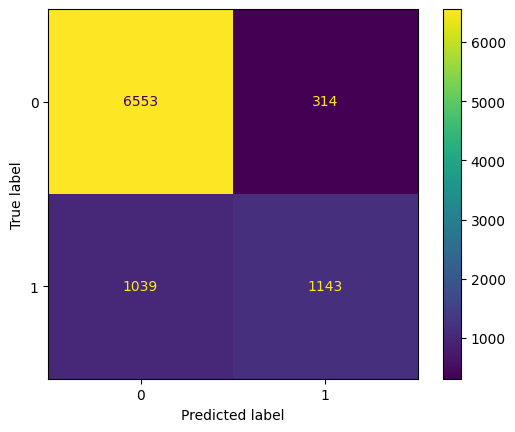

In [90]:
# import ConfusionMatrixDisplay for plotting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# plot confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_default, X_test, y_test)
plt.show()

In [91]:
# Importing required packages(tree from sklearn) for visualization
from sklearn import tree

#Putting all classes in list i.e >=50 and <=50
cls= ['<=50K','>50K']
cls

['<=50K', '>50K']

In [92]:
# Putting all feature names in a list
features = list(df.columns[1:])
features

['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

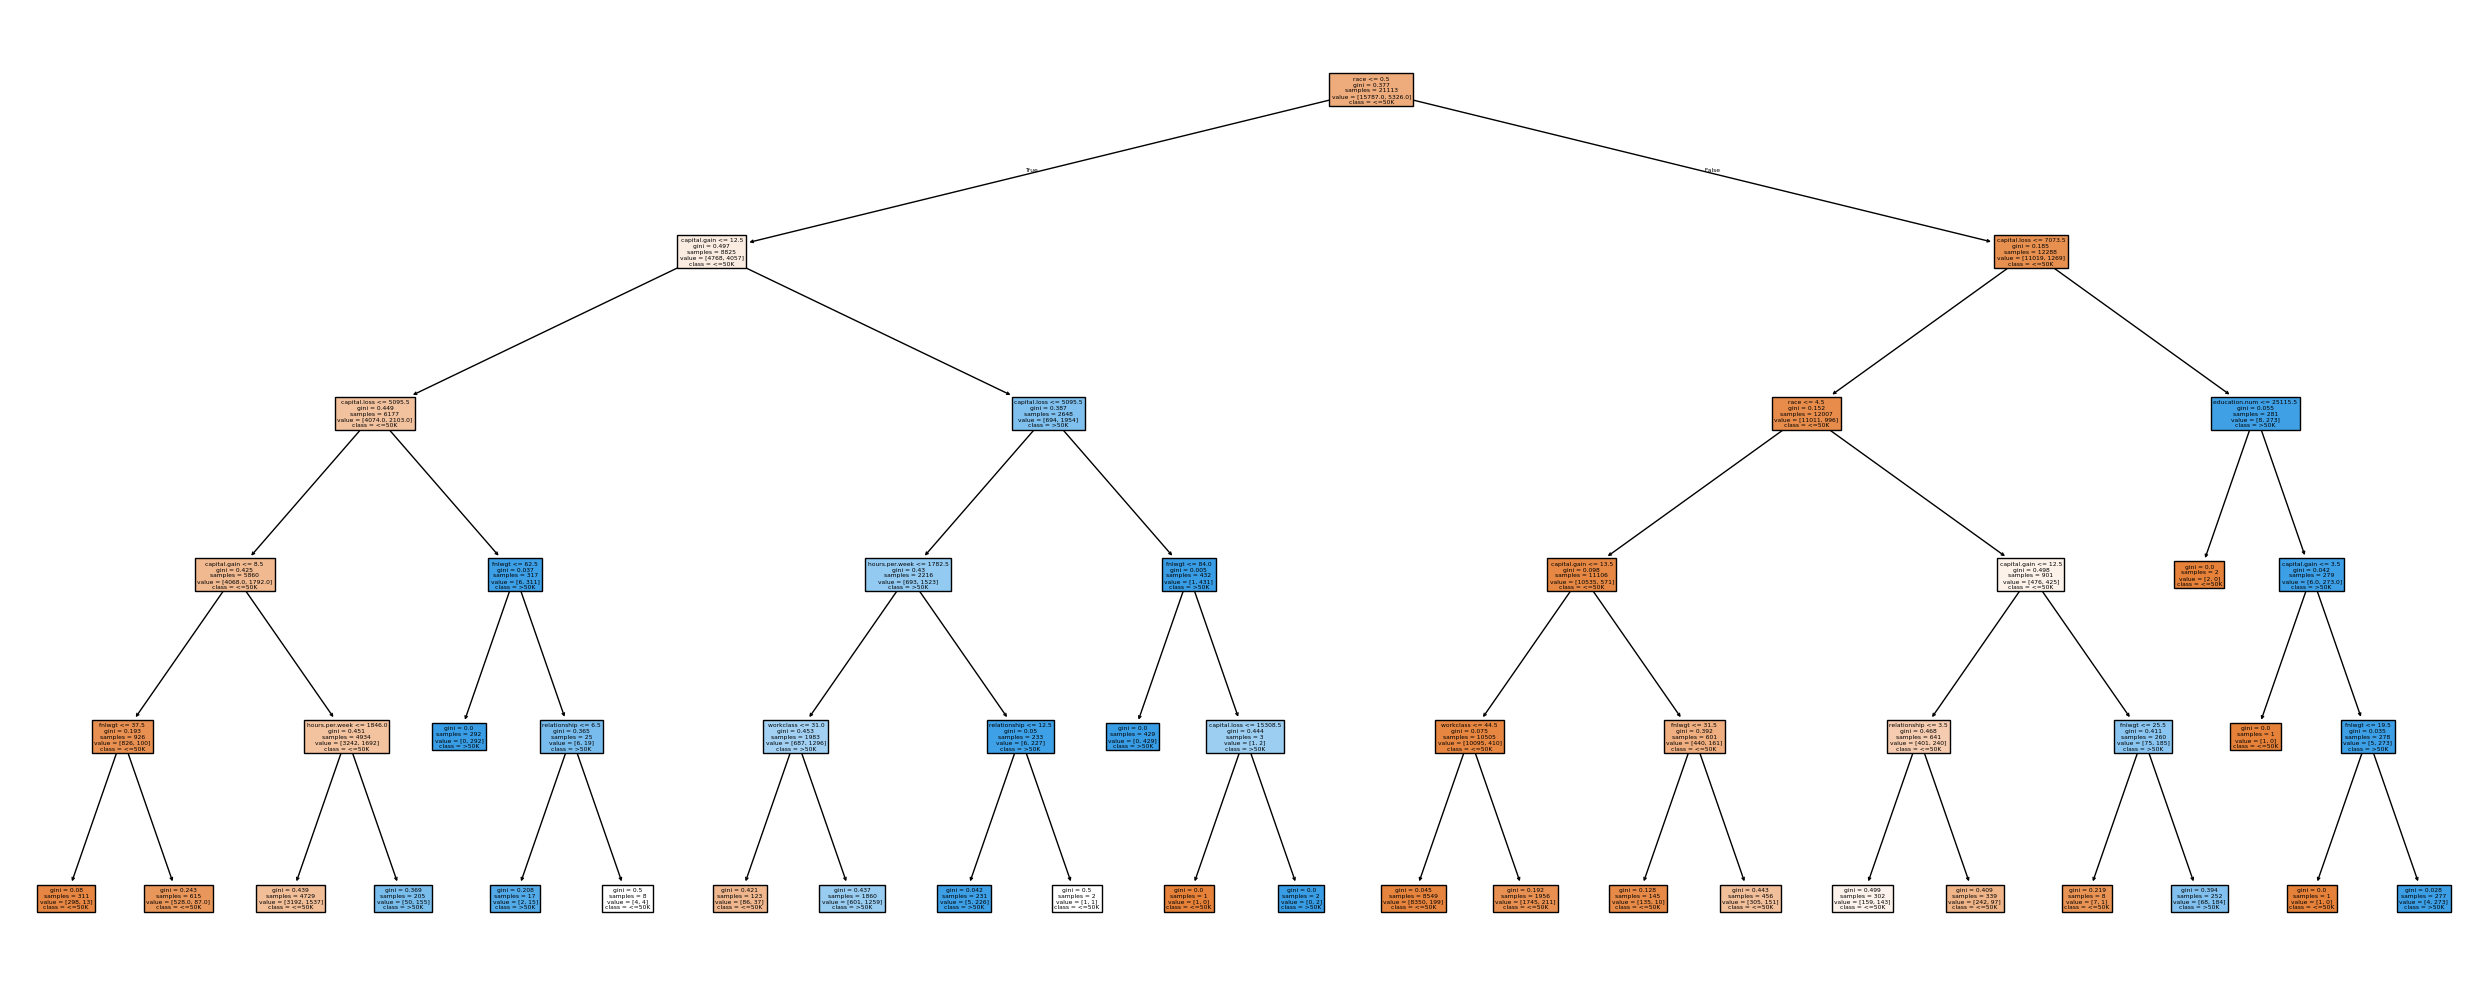

In [93]:
#Plotting our decision tree for max_depth=3
plt.figure(figsize=(25,10))
tree.plot_tree(dt_default, feature_names=features, class_names=cls, filled=True)
plt.tight_layout()
a =plt.savefig('dt_default.png')


In [94]:
# Print textual representation of a tree
text_representation = tree.export_text(dt_default, feature_names=features)

# print text_representation
print(text_representation)

|--- race <= 0.50
|   |--- capital.gain <= 12.50
|   |   |--- capital.loss <= 5095.50
|   |   |   |--- capital.gain <= 8.50
|   |   |   |   |--- fnlwgt <= 37.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fnlwgt >  37.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- capital.gain >  8.50
|   |   |   |   |--- hours.per.week <= 1846.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- hours.per.week >  1846.00
|   |   |   |   |   |--- class: 1
|   |   |--- capital.loss >  5095.50
|   |   |   |--- fnlwgt <= 62.50
|   |   |   |   |--- class: 1
|   |   |   |--- fnlwgt >  62.50
|   |   |   |   |--- relationship <= 6.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- relationship >  6.50
|   |   |   |   |   |--- class: 0
|   |--- capital.gain >  12.50
|   |   |--- capital.loss <= 5095.50
|   |   |   |--- hours.per.week <= 1782.50
|   |   |   |   |--- workclass <= 31.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- workclass >  31.00
|   |   |   |   |   |---

In [104]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

Tunning Max_depth

In [95]:
# Import Kfold and GridSearchCV
from sklearn.model_selection import KFold, GridSearchCV

# specify number of folds for k-fold CV (we are taking 5)
n_folds = 5

# parameters to build the model on ( As of now just max_depth from range 1 to 40)
parameters = {'max_depth': range(1, 40)}


# instantiate the model (DecisionTreeClassifier) with criteria gini and random_state as 100
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)


# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(estimator=dtree, param_grid=parameters, scoring='accuracy', cv=n_folds,n_jobs=-1, return_train_score=True)



#fit the tree on training data
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy')

In [96]:
# scores of GridSearch CV
scores = tree.cv_results_


#Check the scores in a dataframe  (here just printing first 5 rows)
pd.DataFrame(scores).head()



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021232,0.002157,0.005565,0.002080,1,{'max_depth': 1},0.747810,0.747810,0.747573,0.747750,...,0.747738,0.000087,39,0.747721,0.747721,0.747780,0.747735,0.747735,0.747738,0.000022
1,0.030622,0.000805,0.004569,0.000241,2,{'max_depth': 2},0.812219,0.818612,0.820507,0.825675,...,0.819969,0.004538,16,0.821906,0.820308,0.819834,0.818542,0.819253,0.819969,0.001134
2,0.040644,0.001288,0.004449,0.000225,3,{'max_depth': 3},0.828558,0.834241,0.834478,0.836570,...,0.834273,0.003115,12,0.835998,0.834577,0.834458,0.833758,0.833758,0.834510,0.000819
3,0.049145,0.000825,0.004372,0.000090,4,{'max_depth': 4},0.832583,0.840871,0.842529,0.842729,...,0.840193,0.003860,9,0.841622,0.839491,0.844997,0.838908,0.845421,0.842088,0.002707
4,0.058508,0.001922,0.004723,0.000458,5,{'max_depth': 5},0.834241,0.844897,0.847265,0.842729,...,0.843319,0.004858,7,0.844287,0.844227,0.849319,0.841572,0.849683,0.845818,0.003165


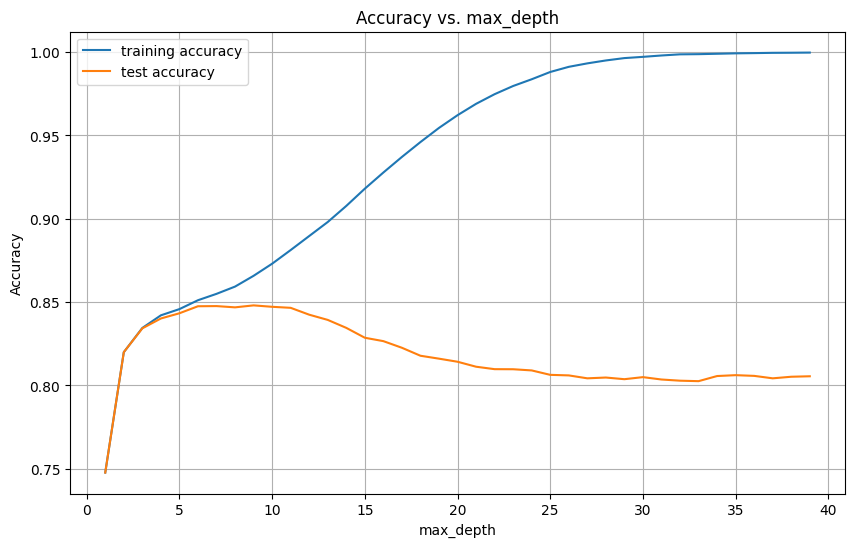

In [97]:
# plotting accuracies with max_depth vs mean train and test scores
plt.figure(figsize=(10,6))
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. max_depth")
plt.legend()
plt.grid(True)
plt.show()

Tuning Min_Sample_leaf


In [98]:
 #GridSearchCV to find optimal max_depth


# specify number of folds for k-fold CV (here 5)
n_folds = 5

# parameters to build the model on( just min_samples_leaf with range 5 to 200 and with step of 20)
parameters = {'min_samples_leaf': range(5, 200, 20)}


# instantiate the model (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)



# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(estimator=dtree, param_grid=parameters, scoring='accuracy', cv=n_folds, n_jobs=-1, return_train_score=True)



#fit the tree on training data
tree.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [99]:
# scores of GridSearch CV
scores = tree.cv_results_

# convert scores into dataframe
scores_df = pd.DataFrame(scores)


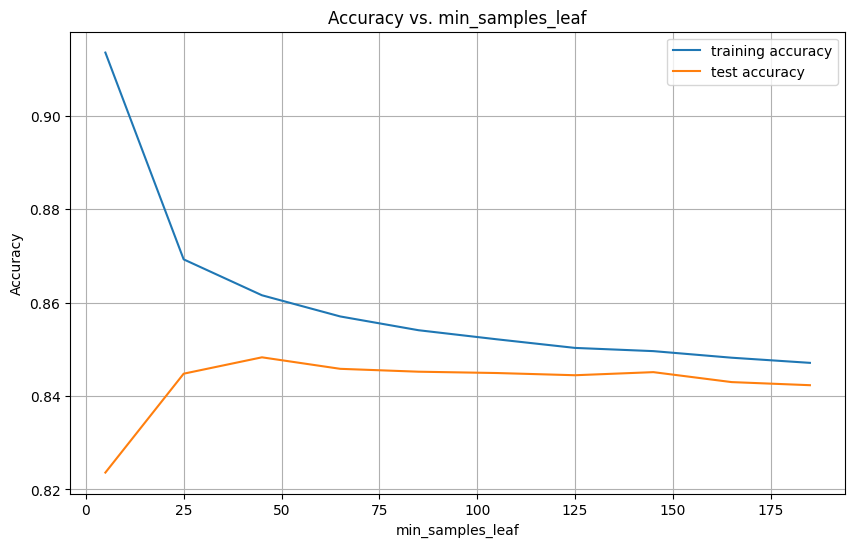

In [100]:
# plotting accuracies with min_samples_leaf vs mean train and test accuracy
plt.figure(figsize=(10,6))
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. min_samples_leaf")
plt.legend()
plt.grid(True)
plt.show()

We can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

Tuning Min_Sample_split

In [101]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on (here just min_samples_split with range 5 to 200 with step size as 20)
parameters = {'min_samples_split': range(5, 200, 20)}


# instantiate the model(DecisionTreeClassifier)
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(estimator=dtree, param_grid=parameters, scoring='accuracy', cv=n_folds, n_jobs=-1, return_train_score=True)

#fitting the above tree on training data
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [102]:
# scores of GridSearch CV
scores = tree.cv_results_

# convert scores into df
scores_df = pd.DataFrame(scores)


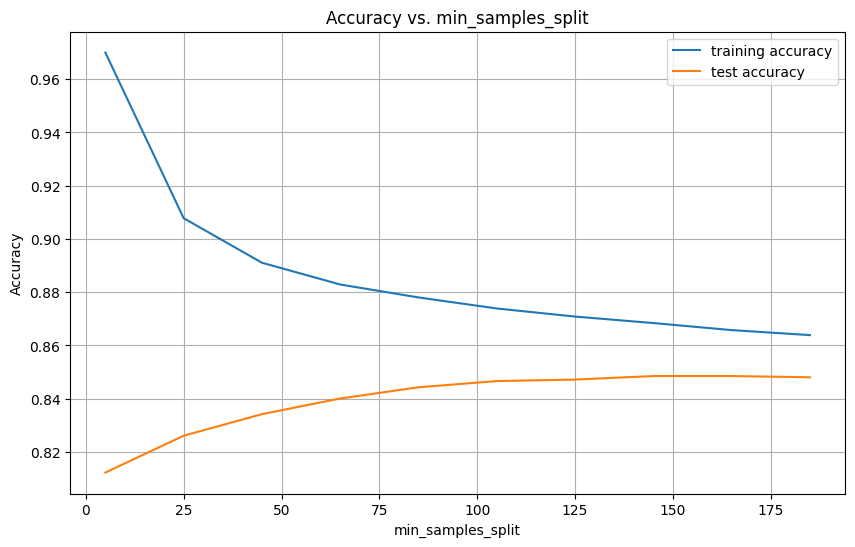

In [103]:
# plotting accuracies with min_samples_leaf  vs mean train and test accuracy

plt.figure(figsize=(10,6))
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. min_samples_split")
plt.legend()
plt.grid(True)




Grid Search to Find Optimal Hyperparameters

In [105]:
# Create the parameter grid ( we already defined for you)
params= {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# no. of folds(5)
n_folds = 5

# Instantiate the grid search model with default parameters value
dtree = DecisionTreeClassifier()


# instantiate GridSearchCV with above 3 parameters and verbose as 1
grid_search = GridSearchCV(estimator=dtree, param_grid=params, cv=n_folds,n_jobs=-1, verbose=1)


#fit the grid_search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [106]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)

# print cv results
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.099981,0.034082,0.006336,0.001825,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
1,0.096019,0.018811,0.007914,0.003057,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
2,0.106434,0.021731,0.007945,0.003169,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
3,0.083886,0.023951,0.005769,0.001828,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
4,0.159195,0.018521,0.005990,0.002343,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
5,0.172679,0.032412,0.005211,0.001257,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
6,0.147196,0.026330,0.007259,0.003068,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
7,0.141932,0.029257,0.006864,0.002977,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
8,0.095983,0.023640,0.008652,0.003127,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9
9,0.089543,0.027214,0.005753,0.002414,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9


In [107]:
# printing the optimal accuracy score
print("best accuracy", grid_search.best_score_)

#Printing best hyperparameters parameters & its values
print("best hyperparameters", grid_search.best_params_)

best accuracy 0.8510400232064759
best hyperparameters {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [108]:
# model with optimal hyperparameters also add random state as 100
clf_gini =  DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=50, min_samples_split=50)


# fitting above model with training data/
clf_gini.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [109]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8508122444469002

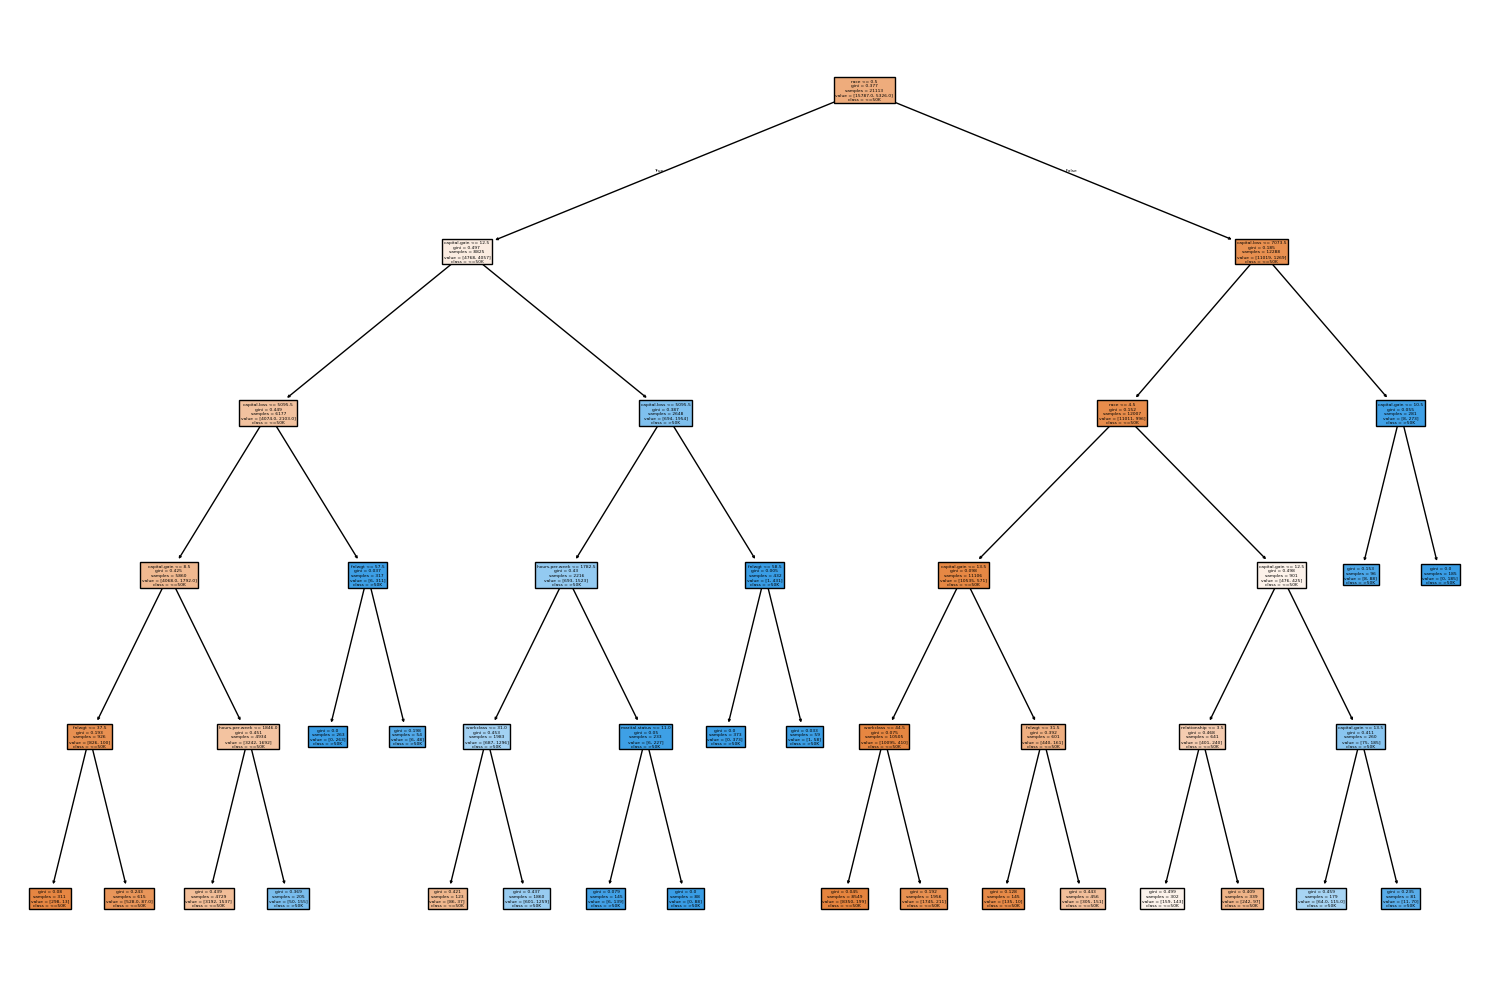

In [111]:
# Importing tree for visualization
from sklearn import tree

# plotting the tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini, feature_names=features, class_names=cls, filled=True)
plt.tight_layout()
a = plt.savefig('dt_default.png')

In [112]:
#The above decision tree hard to understand ,so we reducing the max_depth
# tree with max_depth = 3
clf_gini =  DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=50, min_samples_split=50)


# fitting the model with training data
clf_gini.fit(X_train, y_train)


# Print model score
clf_gini.score(X_test,y_test)



0.8393192617968837

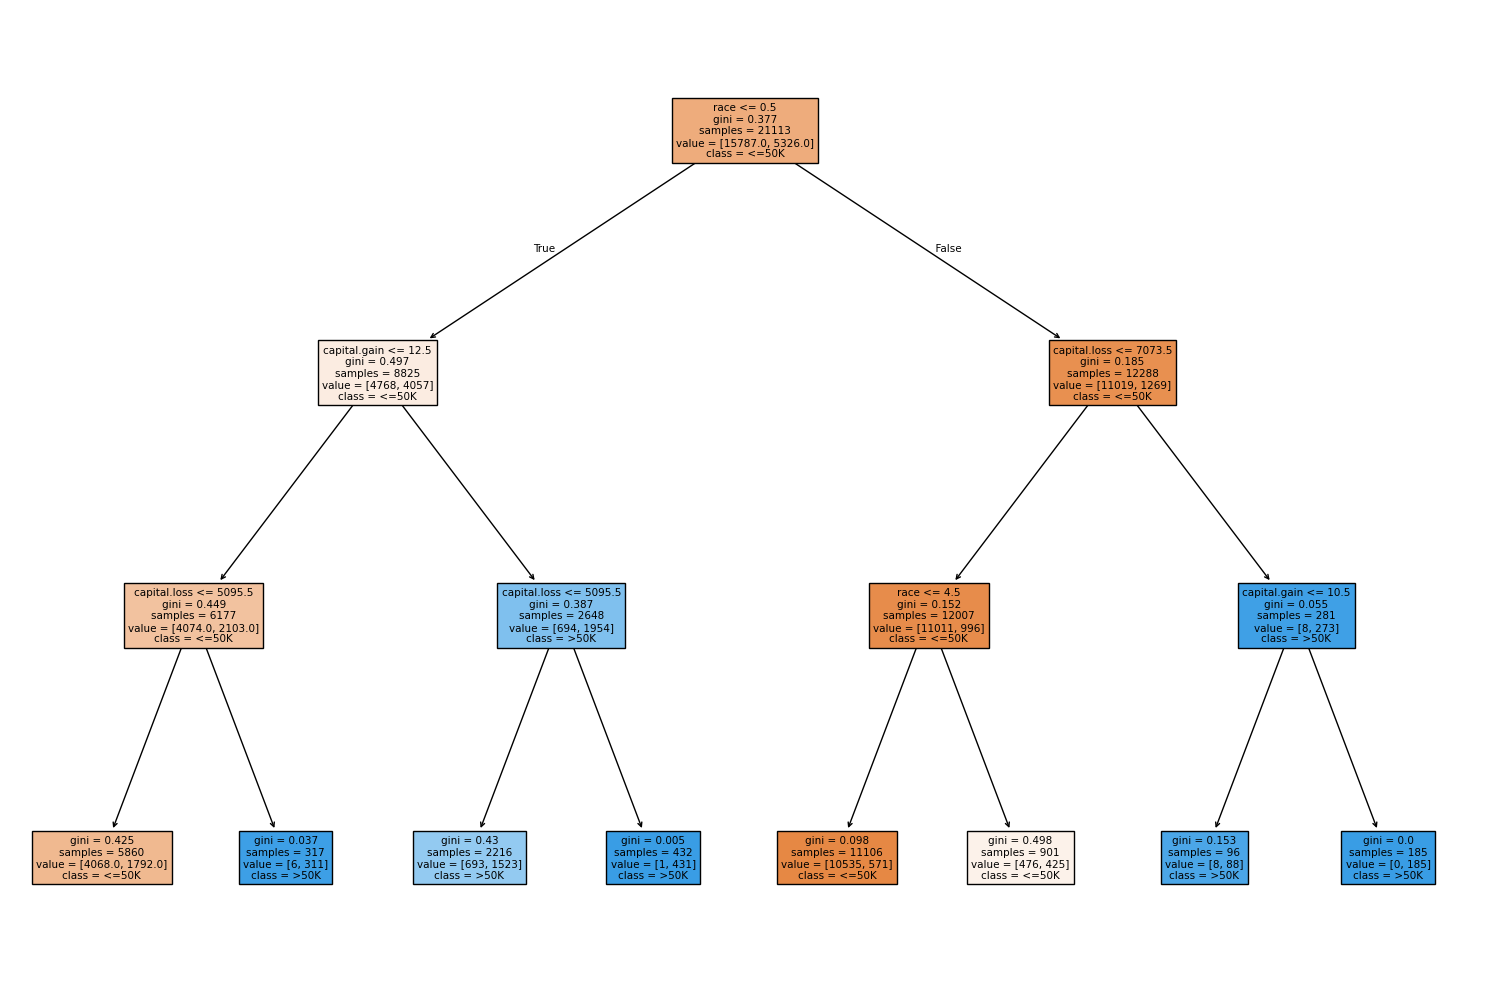

In [115]:
#plotting tree with max_depth=3
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini, feature_names=features, class_names=cls, filled=True)
plt.tight_layout()
a = plt.savefig('dt_default.png')



In [116]:
# Import classification_report and confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = clf_gini.predict(X_test)


# Print classification report
print(classification_report(y_test, y_pred))


# print matrix of classification_report
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049

[[6564  303]
 [1151 1031]]


[[6564  303]
 [1151 1031]]


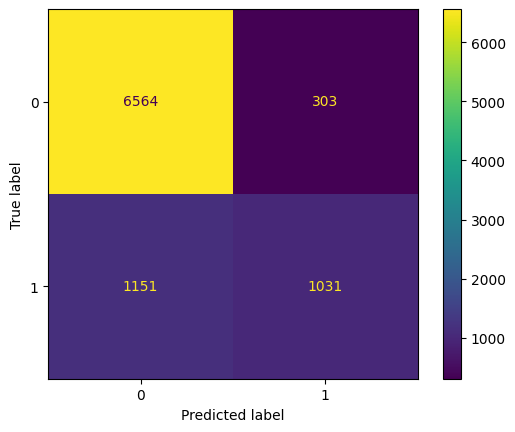

In [117]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

#plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_gini, X_test, y_test)
plt.show()

In [118]:
#Initialise cost_complexity_pruning_path with training data
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)

#Checing out ccp_alphas and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
#Printing all alphas
ccp_alphas

In [119]:
# Initialise empty arrays for train and test accuracy
Accuracy_Train, Accuracy_Test = [], []


#Iterate over ccp_alpha
for ccp_alpha in ccp_alphas:

    #Instantiate DecisionTreeClassifier with random_state=0 and ccp_alpha as ccp_alpha iterated value
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)

    #Fitting model on training data
    clf.fit(X_train, y_train)

    #Appending training accuracy to Accuracy_Train array
    Accuracy_Train.append(clf.score(X_train, y_train))


    #Predicting on train data
    Train_pred= clf.predict(X_train)

    #Appending test accuracy to Accuracy_Test array

    #predicting on test data
    Test_pred= clf.predict(X_test)

    #Appending test accuracy to Accuracy_Test array
    Accuracy_Test.append(clf.score(X_test, y_test))


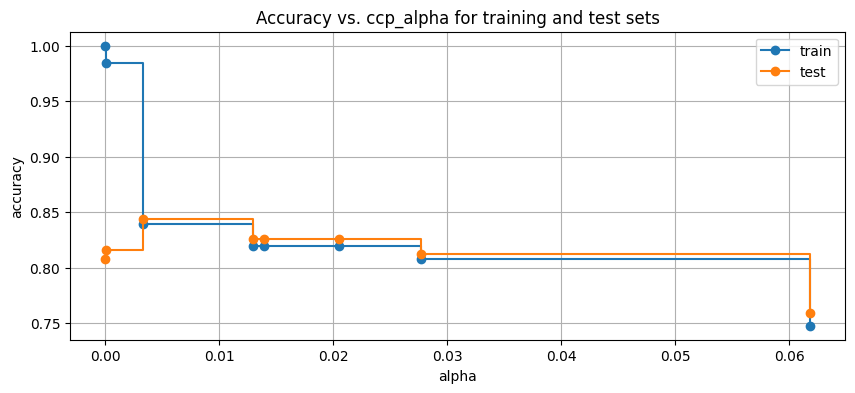

In [122]:
train_scores = Accuracy_Train
test_scores = Accuracy_Test

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs. ccp_alpha for training and test sets")
ax.legend()
ax.grid(True)
plt.show()

In [123]:
#Set '0.01'  as ccp_alpha value in our final deciscion tree
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)


# Instantiate DecisionTreeClassifier
final_dt= clf.fit(X_train, y_train)


#Fitting model on training data
clf.fit(X_train, y_train)


#Predicting on train data
Train_pred= clf.predict(X_train)


#predicting on test data
Test_pred= clf.predict(X_test)

# Print final test and train accuracy
print("Train Accuracy: ", accuracy_score(y_train, Train_pred))


Train Accuracy:  0.8344148155165064


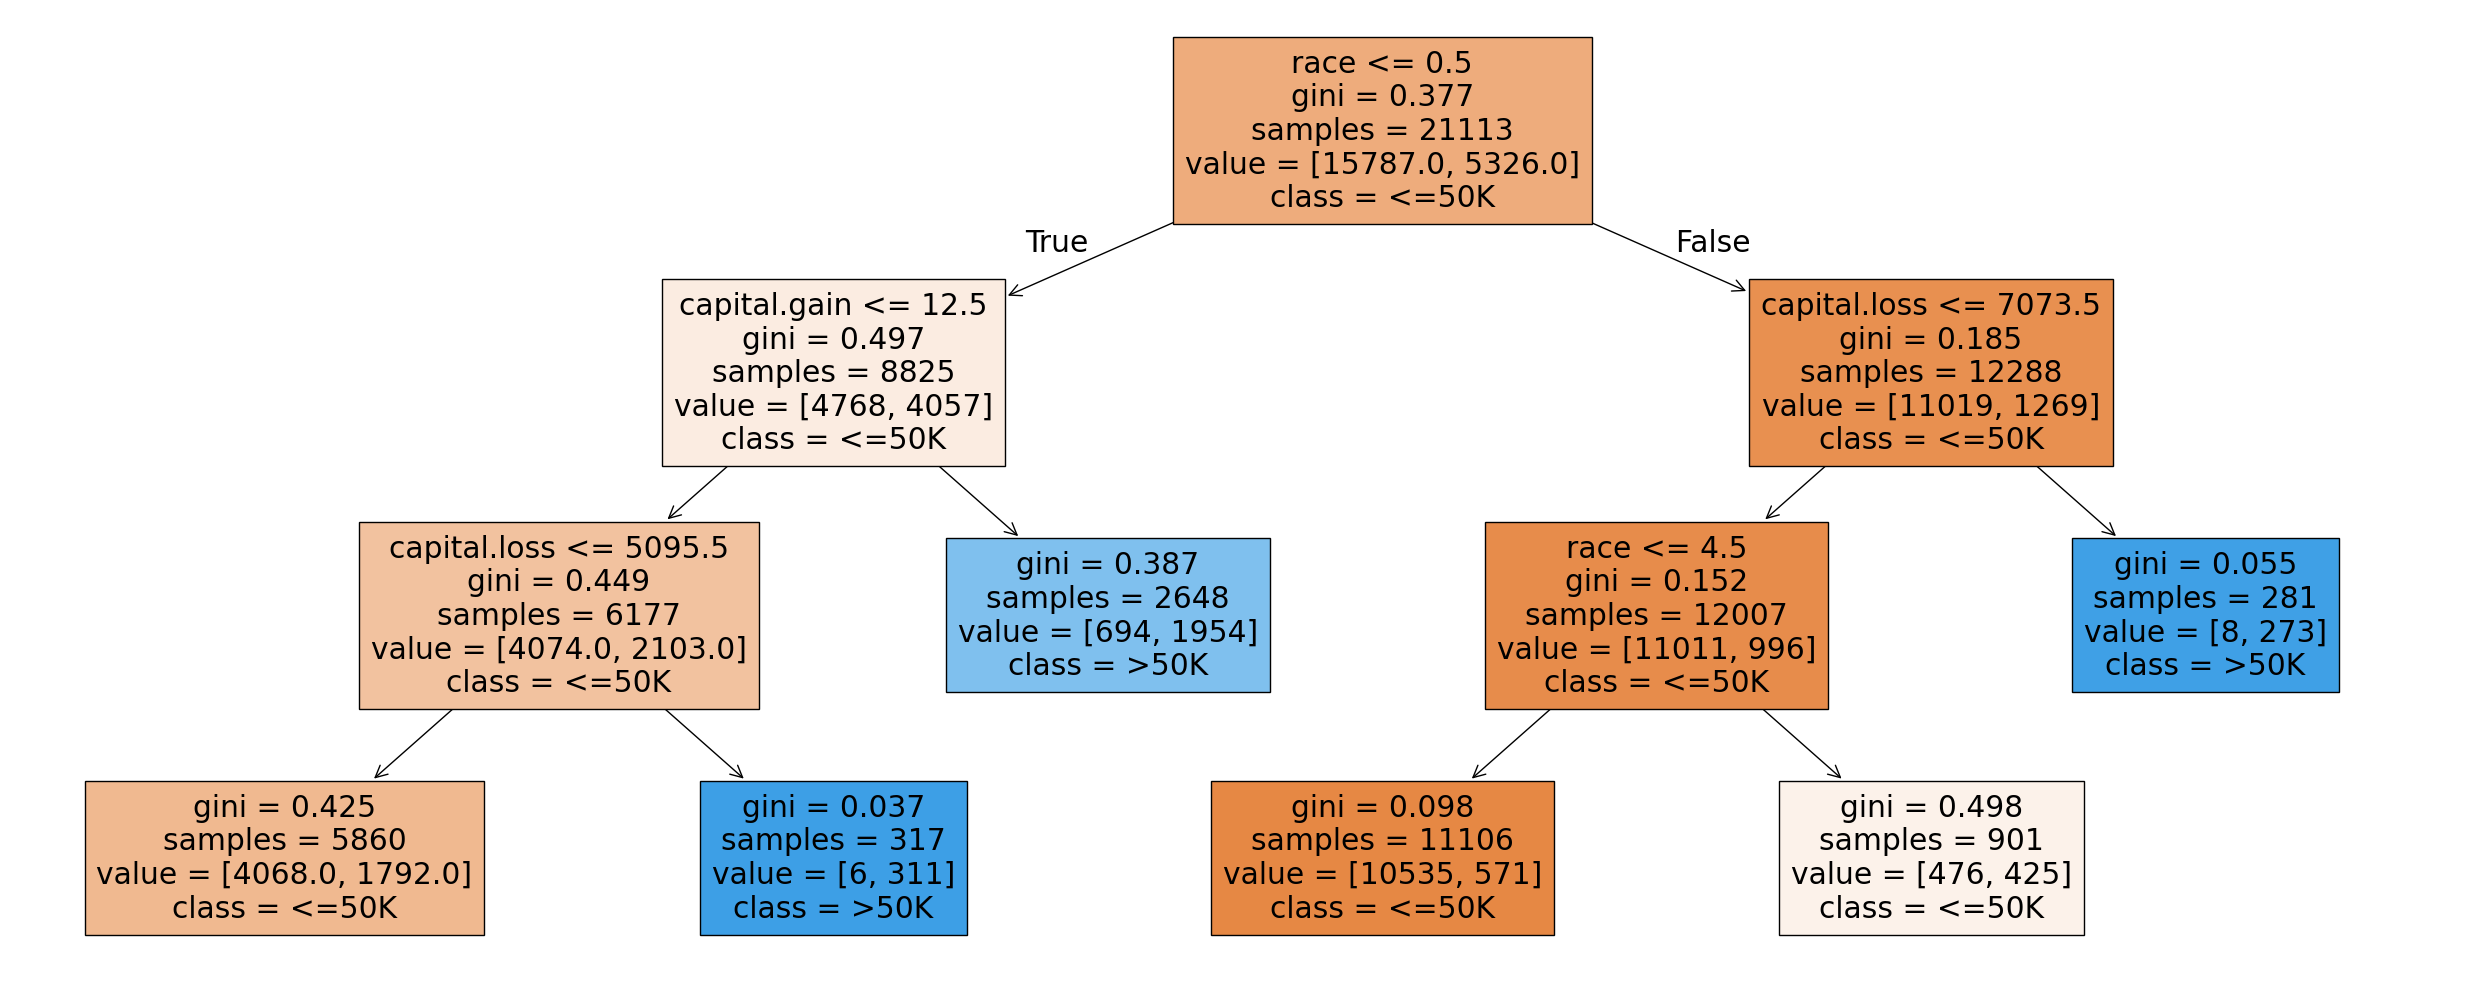

In [126]:
# plotting tree.
plt.figure(figsize=(25,10))
tree.plot_tree(clf, feature_names=features, class_names=cls, filled=True)
plt.tight_layout()
plt.show()